<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_ComplexNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")

import os
from os import path

In [8]:
base = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"
# results = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/results"

In [9]:
# Diretórios com as características extraídas.

folders = os.listdir(features)

print(folders,'\n')

folder = folders[0]

print(folder,'\n')

os.listdir(path.join(features, folder))

['1-covid', '2-other-viruses'] 

1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [10]:
df_complexNet = pd.read_csv(path.join(features, folder,'complex-network-k3l10.csv'))
df_complexNet.name = 'Complex Network Features'
print('Redes Complexas: ', df_complexNet.shape)

Redes Complexas:  (1717, 122)


In [11]:
df_complexNet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 122 columns):
 #   Column   Dtype  
---  ------   -----  
 0   nameseq  object 
 1   AB.1     float64
 2   AD.1     float64
 3   ASSD.1   float64
 4   MAXD.1   float64
 5   MIND.1   float64
 6   AS.1     float64
 7   APL.1    float64
 8   TALU.1   float64
 9   TU.1     float64
 10  NE.1     float64
 11  MOT3.1   float64
 12  MOT4.1   float64
 13  AB.2     float64
 14  AD.2     float64
 15  ASSD.2   float64
 16  MAXD.2   float64
 17  MIND.2   float64
 18  AS.2     float64
 19  APL.2    float64
 20  TALU.2   float64
 21  TU.2     float64
 22  NE.2     float64
 23  MOT3.2   float64
 24  MOT4.2   float64
 25  AB.3     float64
 26  AD.3     float64
 27  ASSD.3   float64
 28  MAXD.3   float64
 29  MIND.3   float64
 30  AS.3     float64
 31  APL.3    float64
 32  TALU.3   float64
 33  TU.3     float64
 34  NE.3     float64
 35  MOT3.3   float64
 36  MOT4.3   float64
 37  AB.4     float64
 38  AD.4   

In [ ]:
base_attr = [ 'AB', 'AD', 'ASSD', 'MAXD', 'MIND', 'AS', 'APL', 'TALU', 'TU', 'NE', 'MOT3', 'MOT4']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

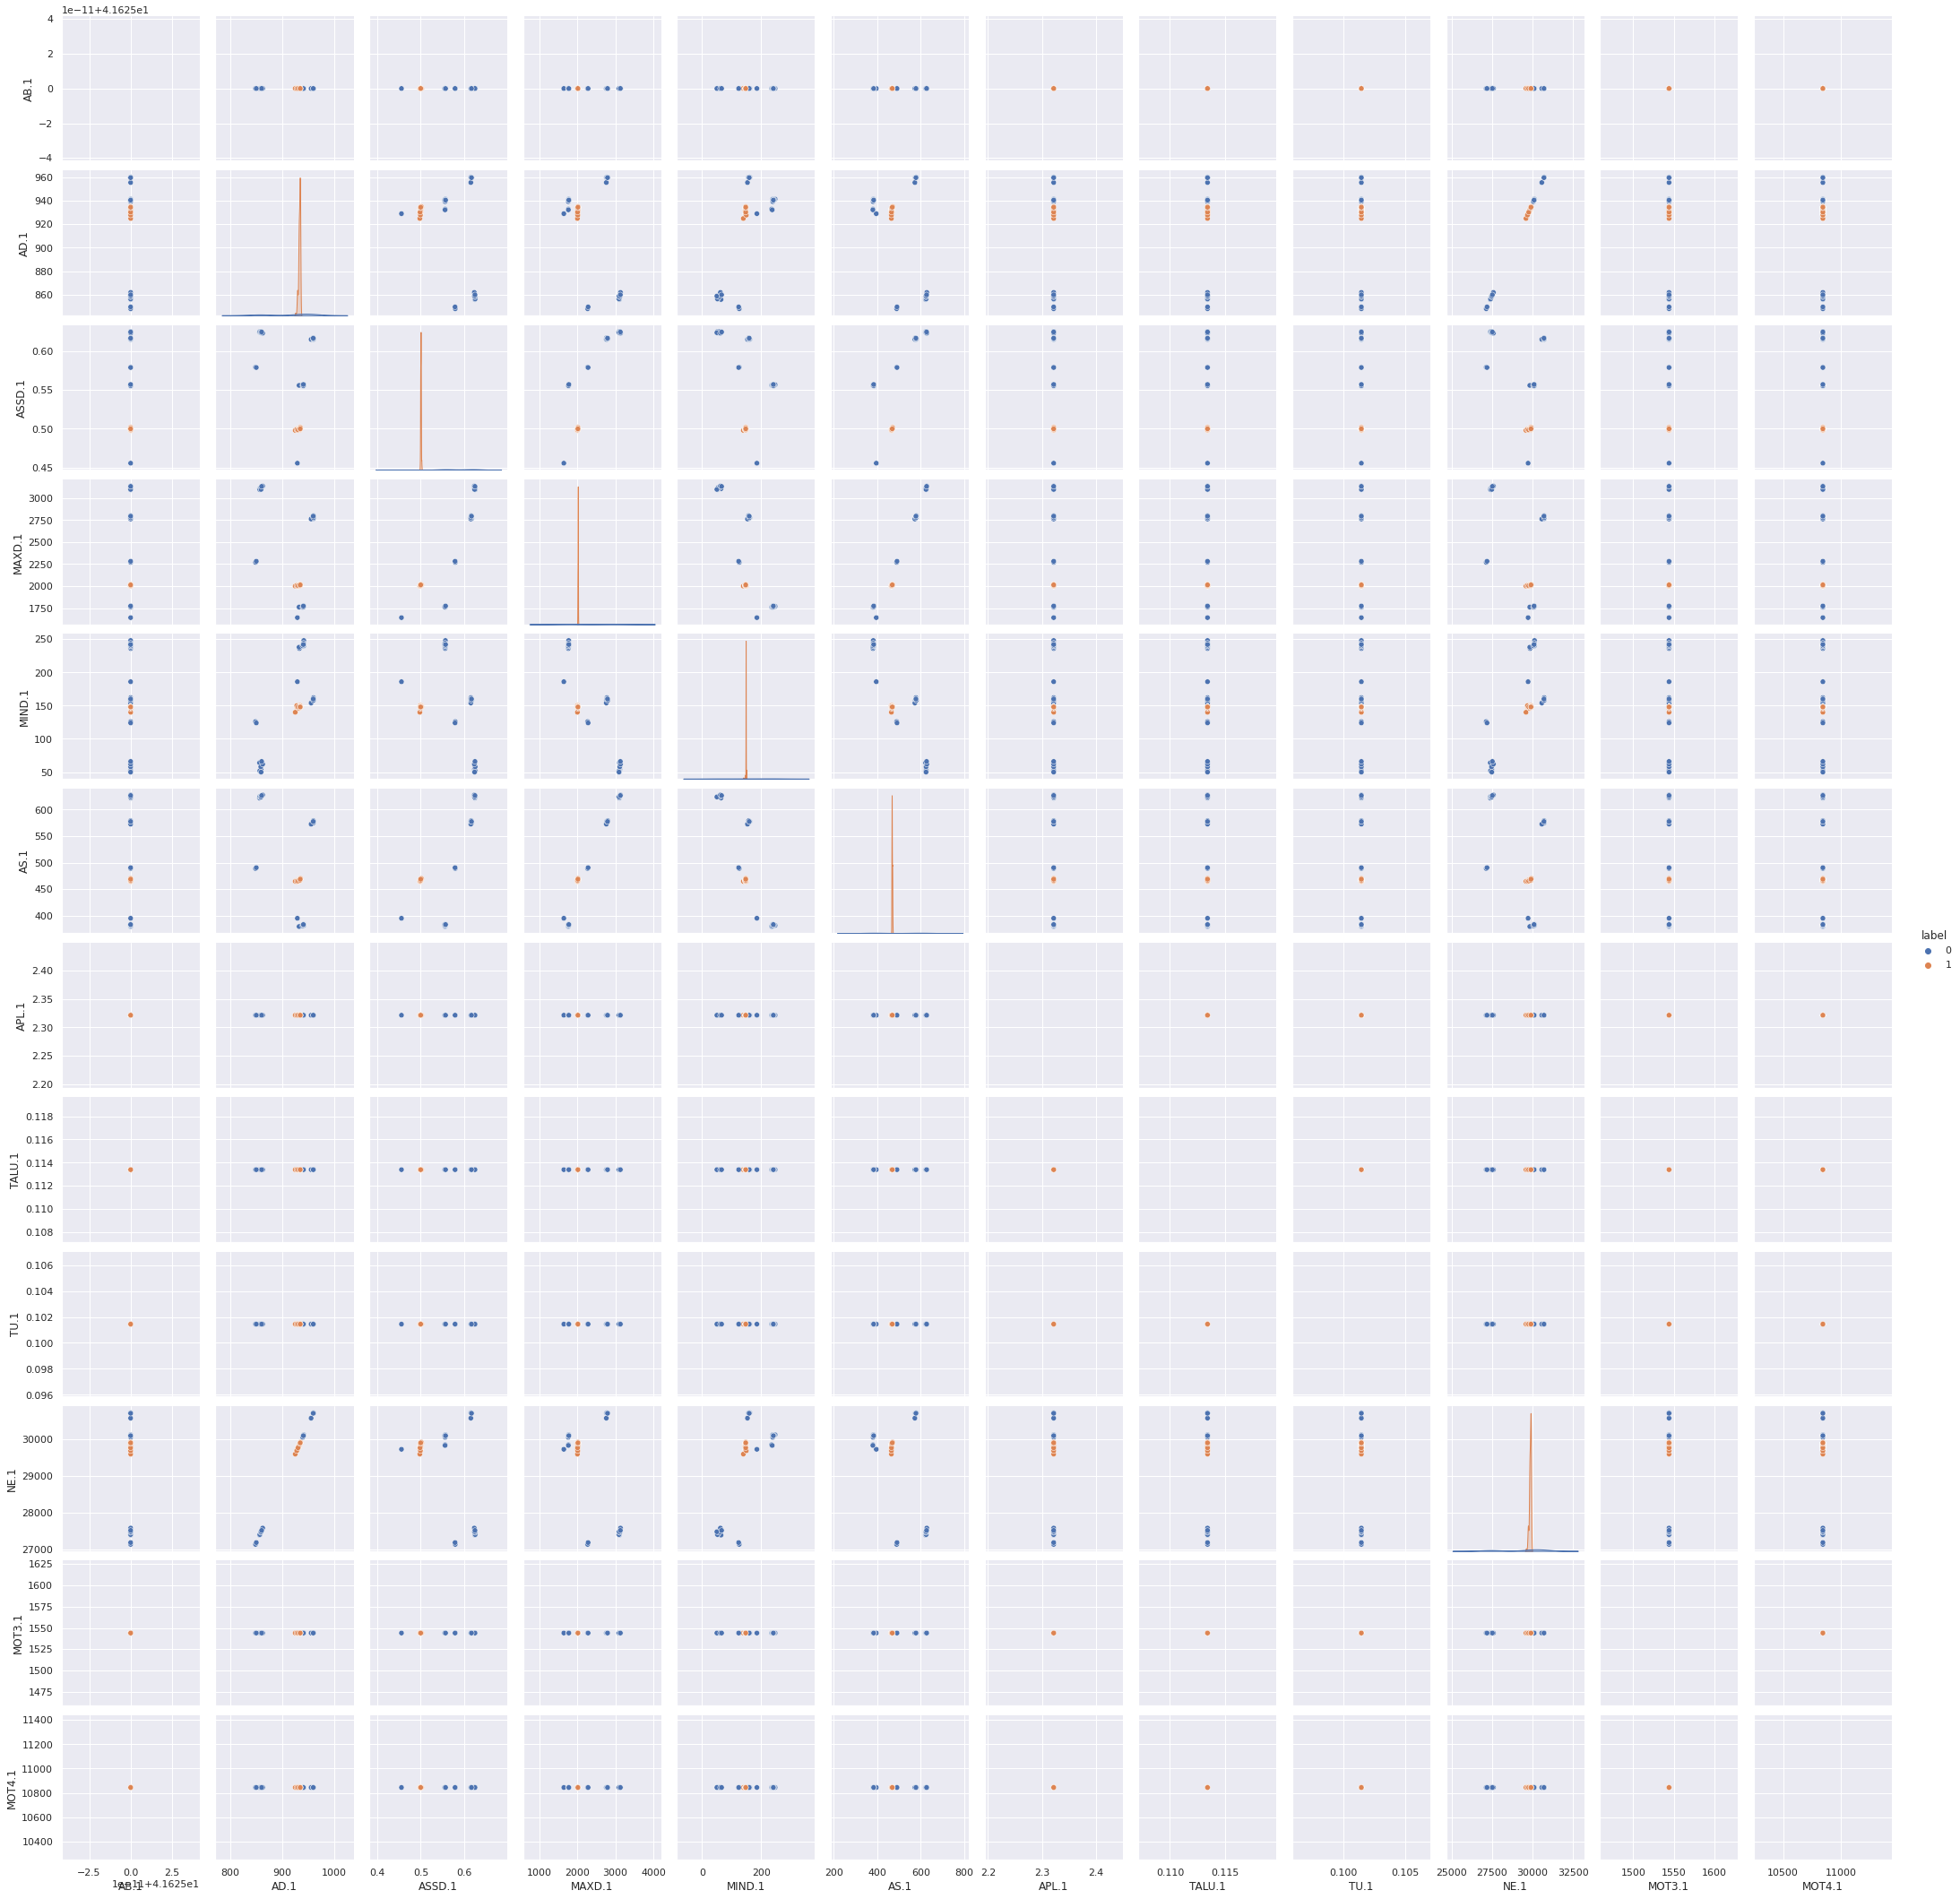

In [12]:
group = 1
col = [f"{attr}.{group}" for attr in base_attr ]
col.append('label')

sns.pairplot(df_complexNet[col], hue="label")

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1.0))

In [15]:
X = scaler.fit_transform(df_complexNet[col])

df = pd.DataFrame(X, columns=col)

df['label'] = df_complexNet['label']

df.head()

,AB.1,AD.1,ASSD.1,MAXD.1,MIND.1,AS.1,APL.1,TALU.1,TU.1,NE.1,MOT3.1,MOT4.1,label
0,0.299191,0.869800,0.717726,0.610367,0.488,0.652877,0.0,1.0,1.0,0.869800,1.0,1.0,0
1,0.299191,0.876583,0.710117,0.617938,0.504,0.658683,0.0,1.0,1.0,0.876583,1.0,1.0,0
2,0.299191,0.876618,0.714107,0.616773,0.512,0.659581,0.0,1.0,1.0,0.876618,1.0,1.0,0
3,0.299191,0.875365,0.715870,0.617356,0.496,0.658231,0.0,1.0,1.0,0.875365,1.0,1.0,0
4,0.299191,0.872200,0.717624,0.610367,0.504,0.655196,0.0,1.0,1.0,0.872200,1.0,1.0,0


In [16]:
df['APL.1'].unique()

array([0.        , 0.00334362, 0.02469136, 1.        ])

In [17]:
df.describe()

,AB.1,AD.1,ASSD.1,MAXD.1,MIND.1,AS.1,APL.1,TALU.1,TU.1,NE.1,MOT3.1,MOT4.1,label
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,0.299714,0.963796,0.378493,0.554730,0.622155,0.629137,0.001196,0.998377,0.998562,0.963814,0.998734,0.998743,0.765288
std,0.026110,0.043523,0.224566,0.093703,0.140554,0.080884,0.034129,0.039030,0.034776,0.043520,0.034374,0.034332,0.423942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299191,0.964867,0.265949,0.533489,0.592000,0.621551,0.000000,1.000000,1.000000,0.964902,1.000000,1.000000,1.000000
50%,0.299191,0.966815,0.269149,0.534653,0.592000,0.622916,0.000000,1.000000,1.000000,0.966815,1.000000,1.000000,1.000000
75%,0.299191,0.968137,0.275287,0.535818,0.592000,0.625465,0.000000,1.000000,1.000000,0.968137,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


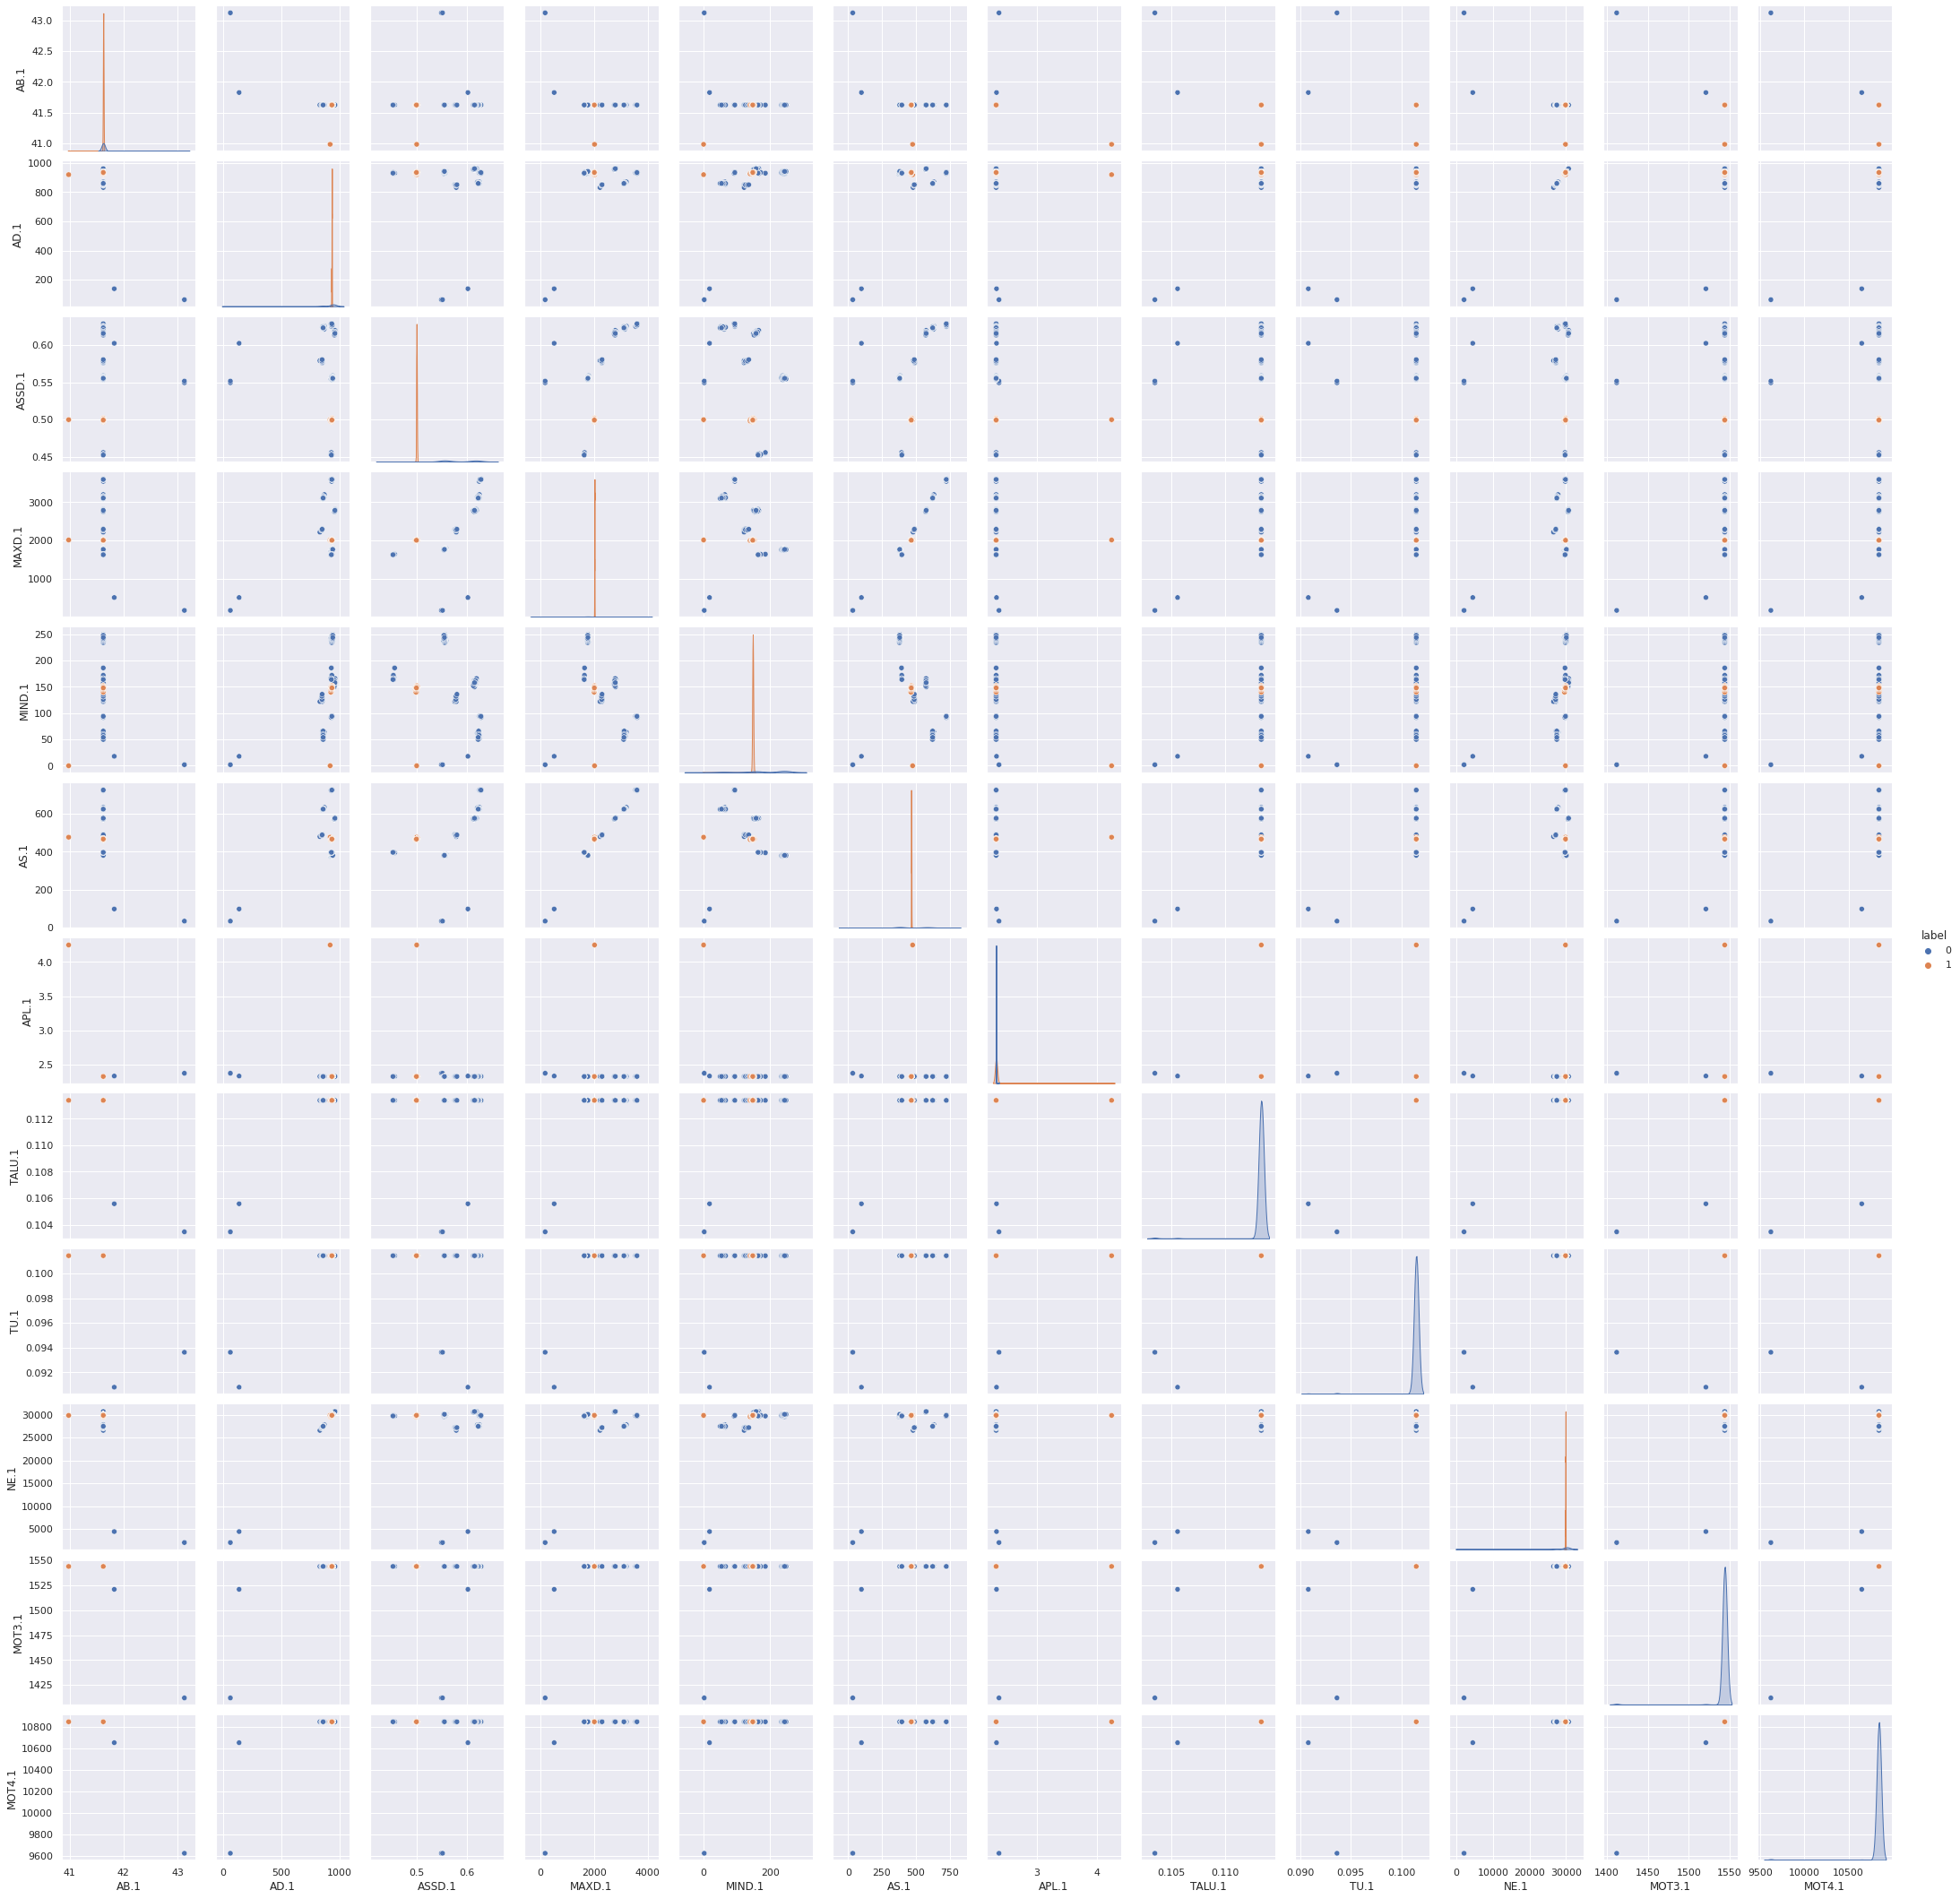

In [18]:
sns.pairplot(df_complexNet[col], hue="label")

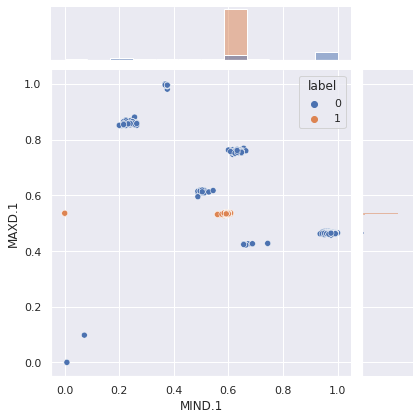

In [40]:
g = sns.JointGrid(data=df, x="MIND.1", y="MAXD.1", hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)

In [ ]:
g = sns.JointGrid(data=df, x="MIND.1", y="MAXD.1", hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

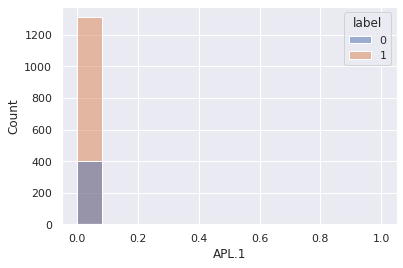

In [41]:
sns.histplot(data=df, x="APL.1", hue="label")

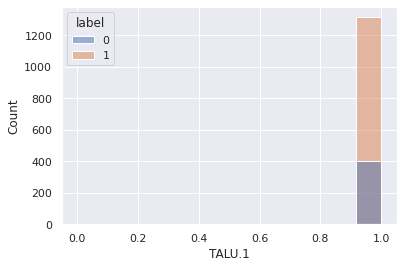

In [22]:
sns.histplot(data=df, x="TALU.1", hue="label")

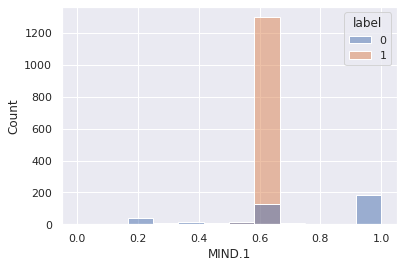

In [23]:
sns.histplot(data=df, x="MIND.1", hue="label")

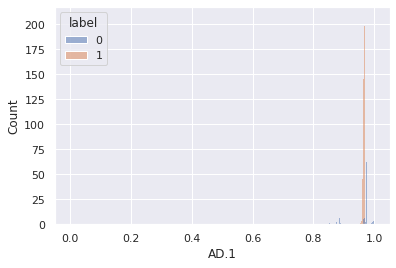

In [26]:
sns.histplot(data=df, x="AD.1", hue="label")

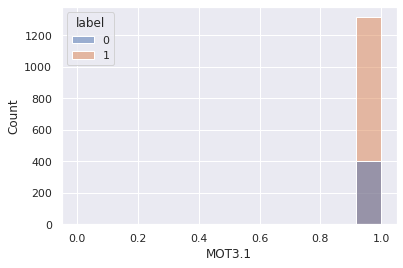

In [27]:
sns.histplot(data=df, x="MOT3.1", hue="label")

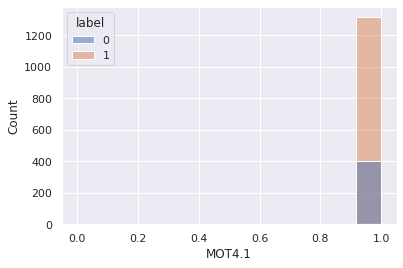

In [29]:
sns.histplot(data=df, x="MOT4.1", hue="label")

In [30]:
df.corr()

,AB.1,AD.1,ASSD.1,MAXD.1,MIND.1,AS.1,APL.1,TALU.1,TU.1,NE.1,MOT3.1,MOT4.1,label
AB.1,1.000000,-0.731587,0.035768,-0.192748,-0.085866,-0.258791,-0.369185,-0.843357,-0.720761,-0.736536,-0.920070,-0.920280,-0.067689
AD.1,-0.731587,1.000000,-0.084860,0.113372,0.376571,0.188835,-0.030091,0.898828,0.884068,0.999922,0.810599,0.806379,0.086823
ASSD.1,0.035768,-0.084860,1.000000,0.710819,0.078694,0.495491,-0.016004,-0.048292,-0.054672,-0.085074,-0.033032,-0.032530,-0.889736
MAXD.1,-0.192748,0.113372,0.710819,1.000000,-0.488138,0.961447,-0.012375,0.234042,0.227428,0.113288,0.215131,0.214139,-0.388287
MIND.1,-0.085866,0.376571,0.078694,-0.488138,1.000000,-0.625460,-0.155071,0.176446,0.173146,0.374696,0.159717,0.158904,-0.399875
AS.1,-0.258791,0.188835,0.495491,0.961447,-0.625460,1.000000,-0.003286,0.310177,0.302642,0.188890,0.283311,0.281949,-0.131253
APL.1,-0.369185,-0.030091,-0.016004,-0.012375,-0.155071,-0.003286,1.000000,-0.021297,-0.018001,-0.017570,-0.023528,-0.023541,0.017282
TALU.1,-0.843357,0.898828,-0.048292,0.234042,0.176446,0.310177,-0.021297,1.000000,0.966621,0.898891,0.926710,0.922666,0.075104
TU.1,-0.720761,0.884068,-0.054672,0.227428,0.173146,0.302642,-0.018001,0.966621,1.000000,0.884130,0.799500,0.793074,0.074684
NE.1,-0.736536,0.999922,-0.085074,0.113288,0.374696,0.188890,-0.017570,0.898891,0.884130,1.000000,0.810655,0.806435,0.087064


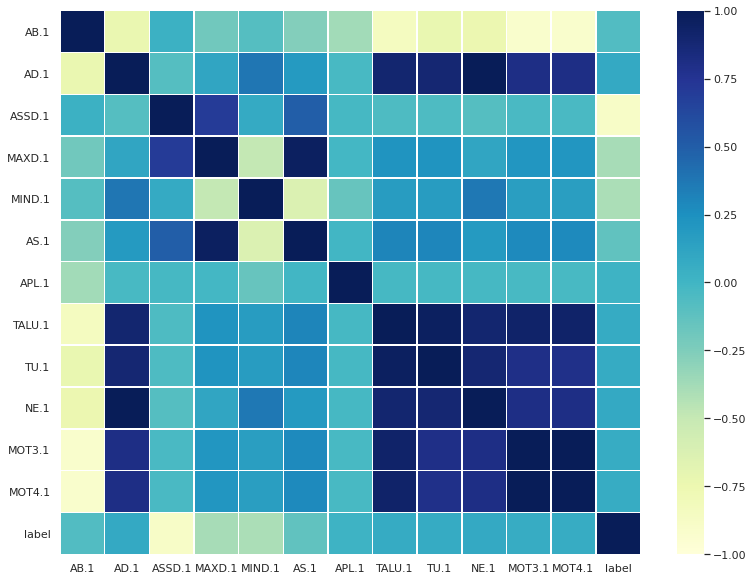

In [36]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

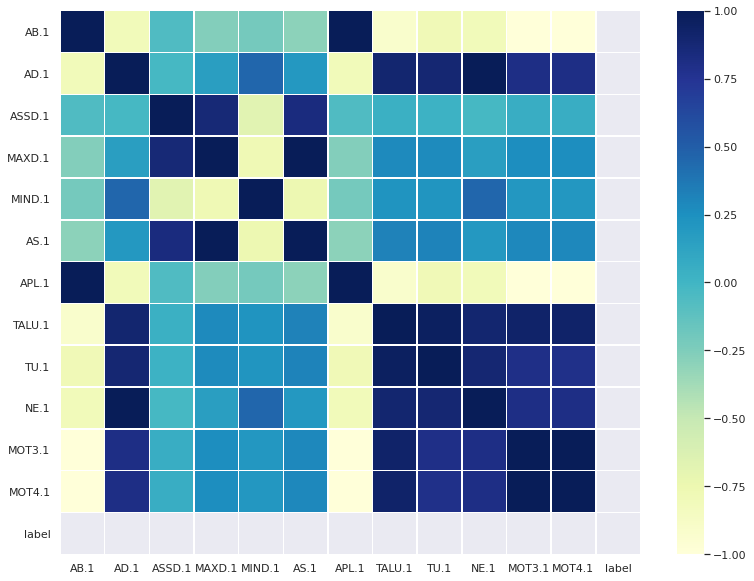

In [37]:
plt.figure(figsize=(13,10))
sns.heatmap(df[df['label'] == 0].corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

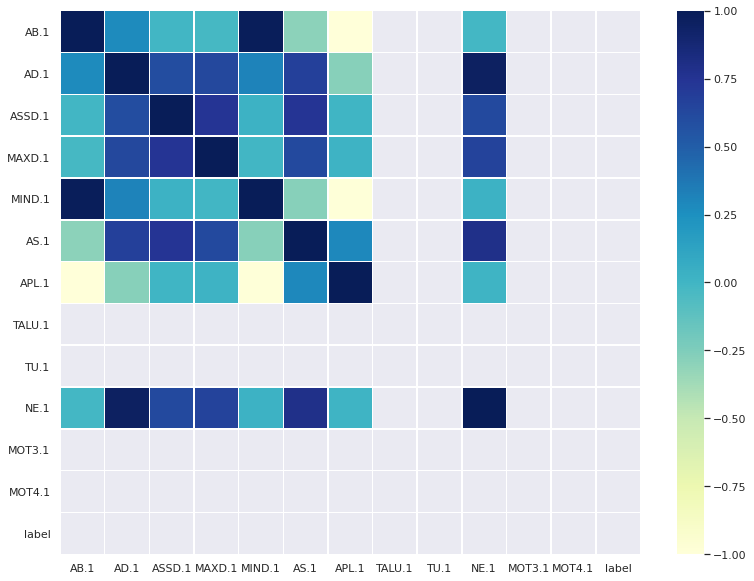

In [38]:
plt.figure(figsize=(13,10))
sns.heatmap(df[df['label'] == 1].corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

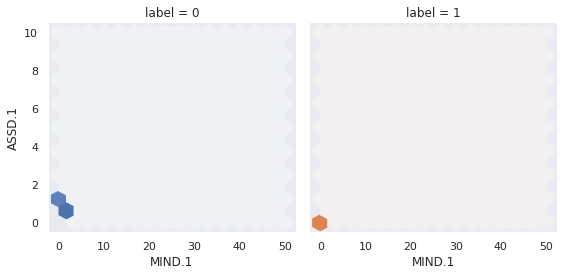

In [44]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue="label", col="label", height=4)

g.map(hexbin, "MIND.1", "ASSD.1", extent=[0, 50, 0, 10]);

In [45]:
group = 5
col = [f"{attr}.{group}" for attr in base_attr ]
col.append('label')

X = scaler.fit_transform(df_complexNet[col])

df = pd.DataFrame(X, columns=col)

df['label'] = df_complexNet['label']

df.describe()

,AB.5,AD.5,ASSD.5,MAXD.5,MIND.5,AS.5,APL.5,TALU.5,TU.5,NE.5,MOT3.5,MOT4.5,label
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,0.084325,0.963986,0.377953,0.554730,0.621167,0.627289,0.001440,0.993126,0.990195,0.963814,0.997197,0.997125,0.765288
std,0.023244,0.043479,0.224319,0.093703,0.143465,0.081273,0.034804,0.051676,0.060866,0.043520,0.037678,0.037854,0.423942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082800,0.965070,0.265922,0.533489,0.592000,0.619641,0.000000,1.000000,1.000000,0.964902,1.000000,1.000000,1.000000
50%,0.082800,0.967007,0.269136,0.534653,0.592000,0.621013,0.000000,1.000000,1.000000,0.966815,1.000000,1.000000,1.000000
75%,0.082800,0.968321,0.275227,0.535818,0.592000,0.623575,0.000000,1.000000,1.000000,0.968137,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


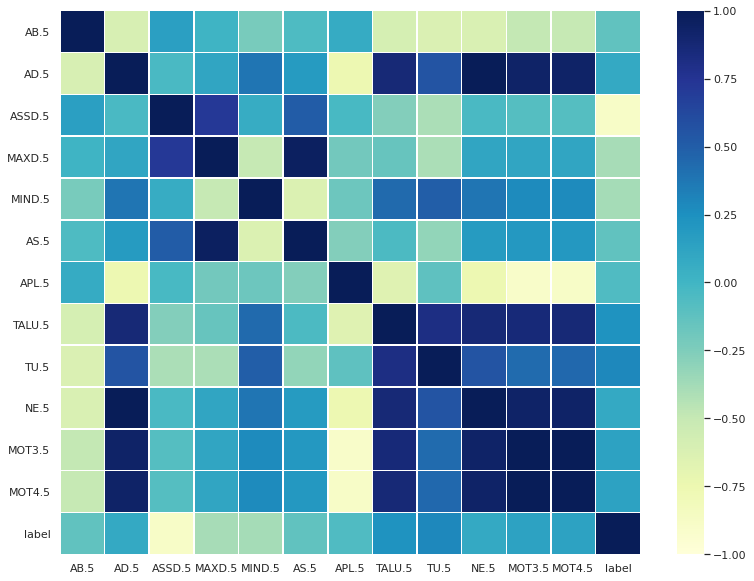

In [46]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

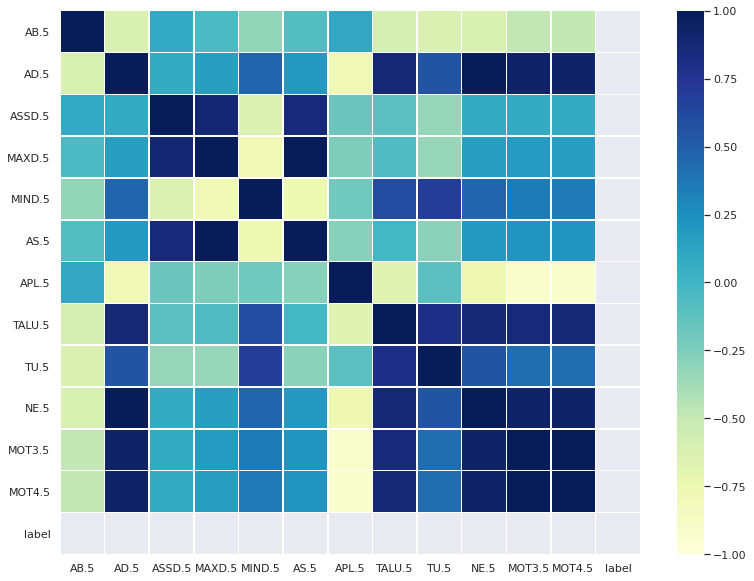

In [48]:
plt.figure(figsize=(13,10))
sns.heatmap(df[df['label'] == 0].corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

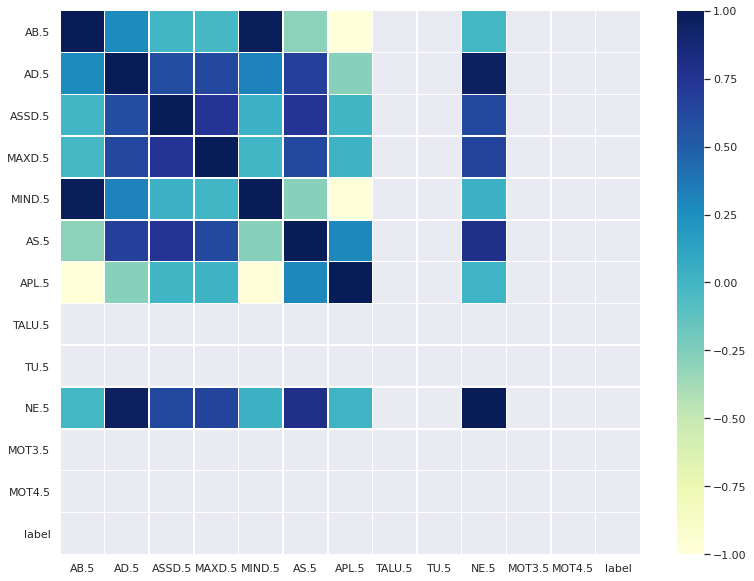

In [49]:
plt.figure(figsize=(13,10))
sns.heatmap(df[df['label'] == 1].corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


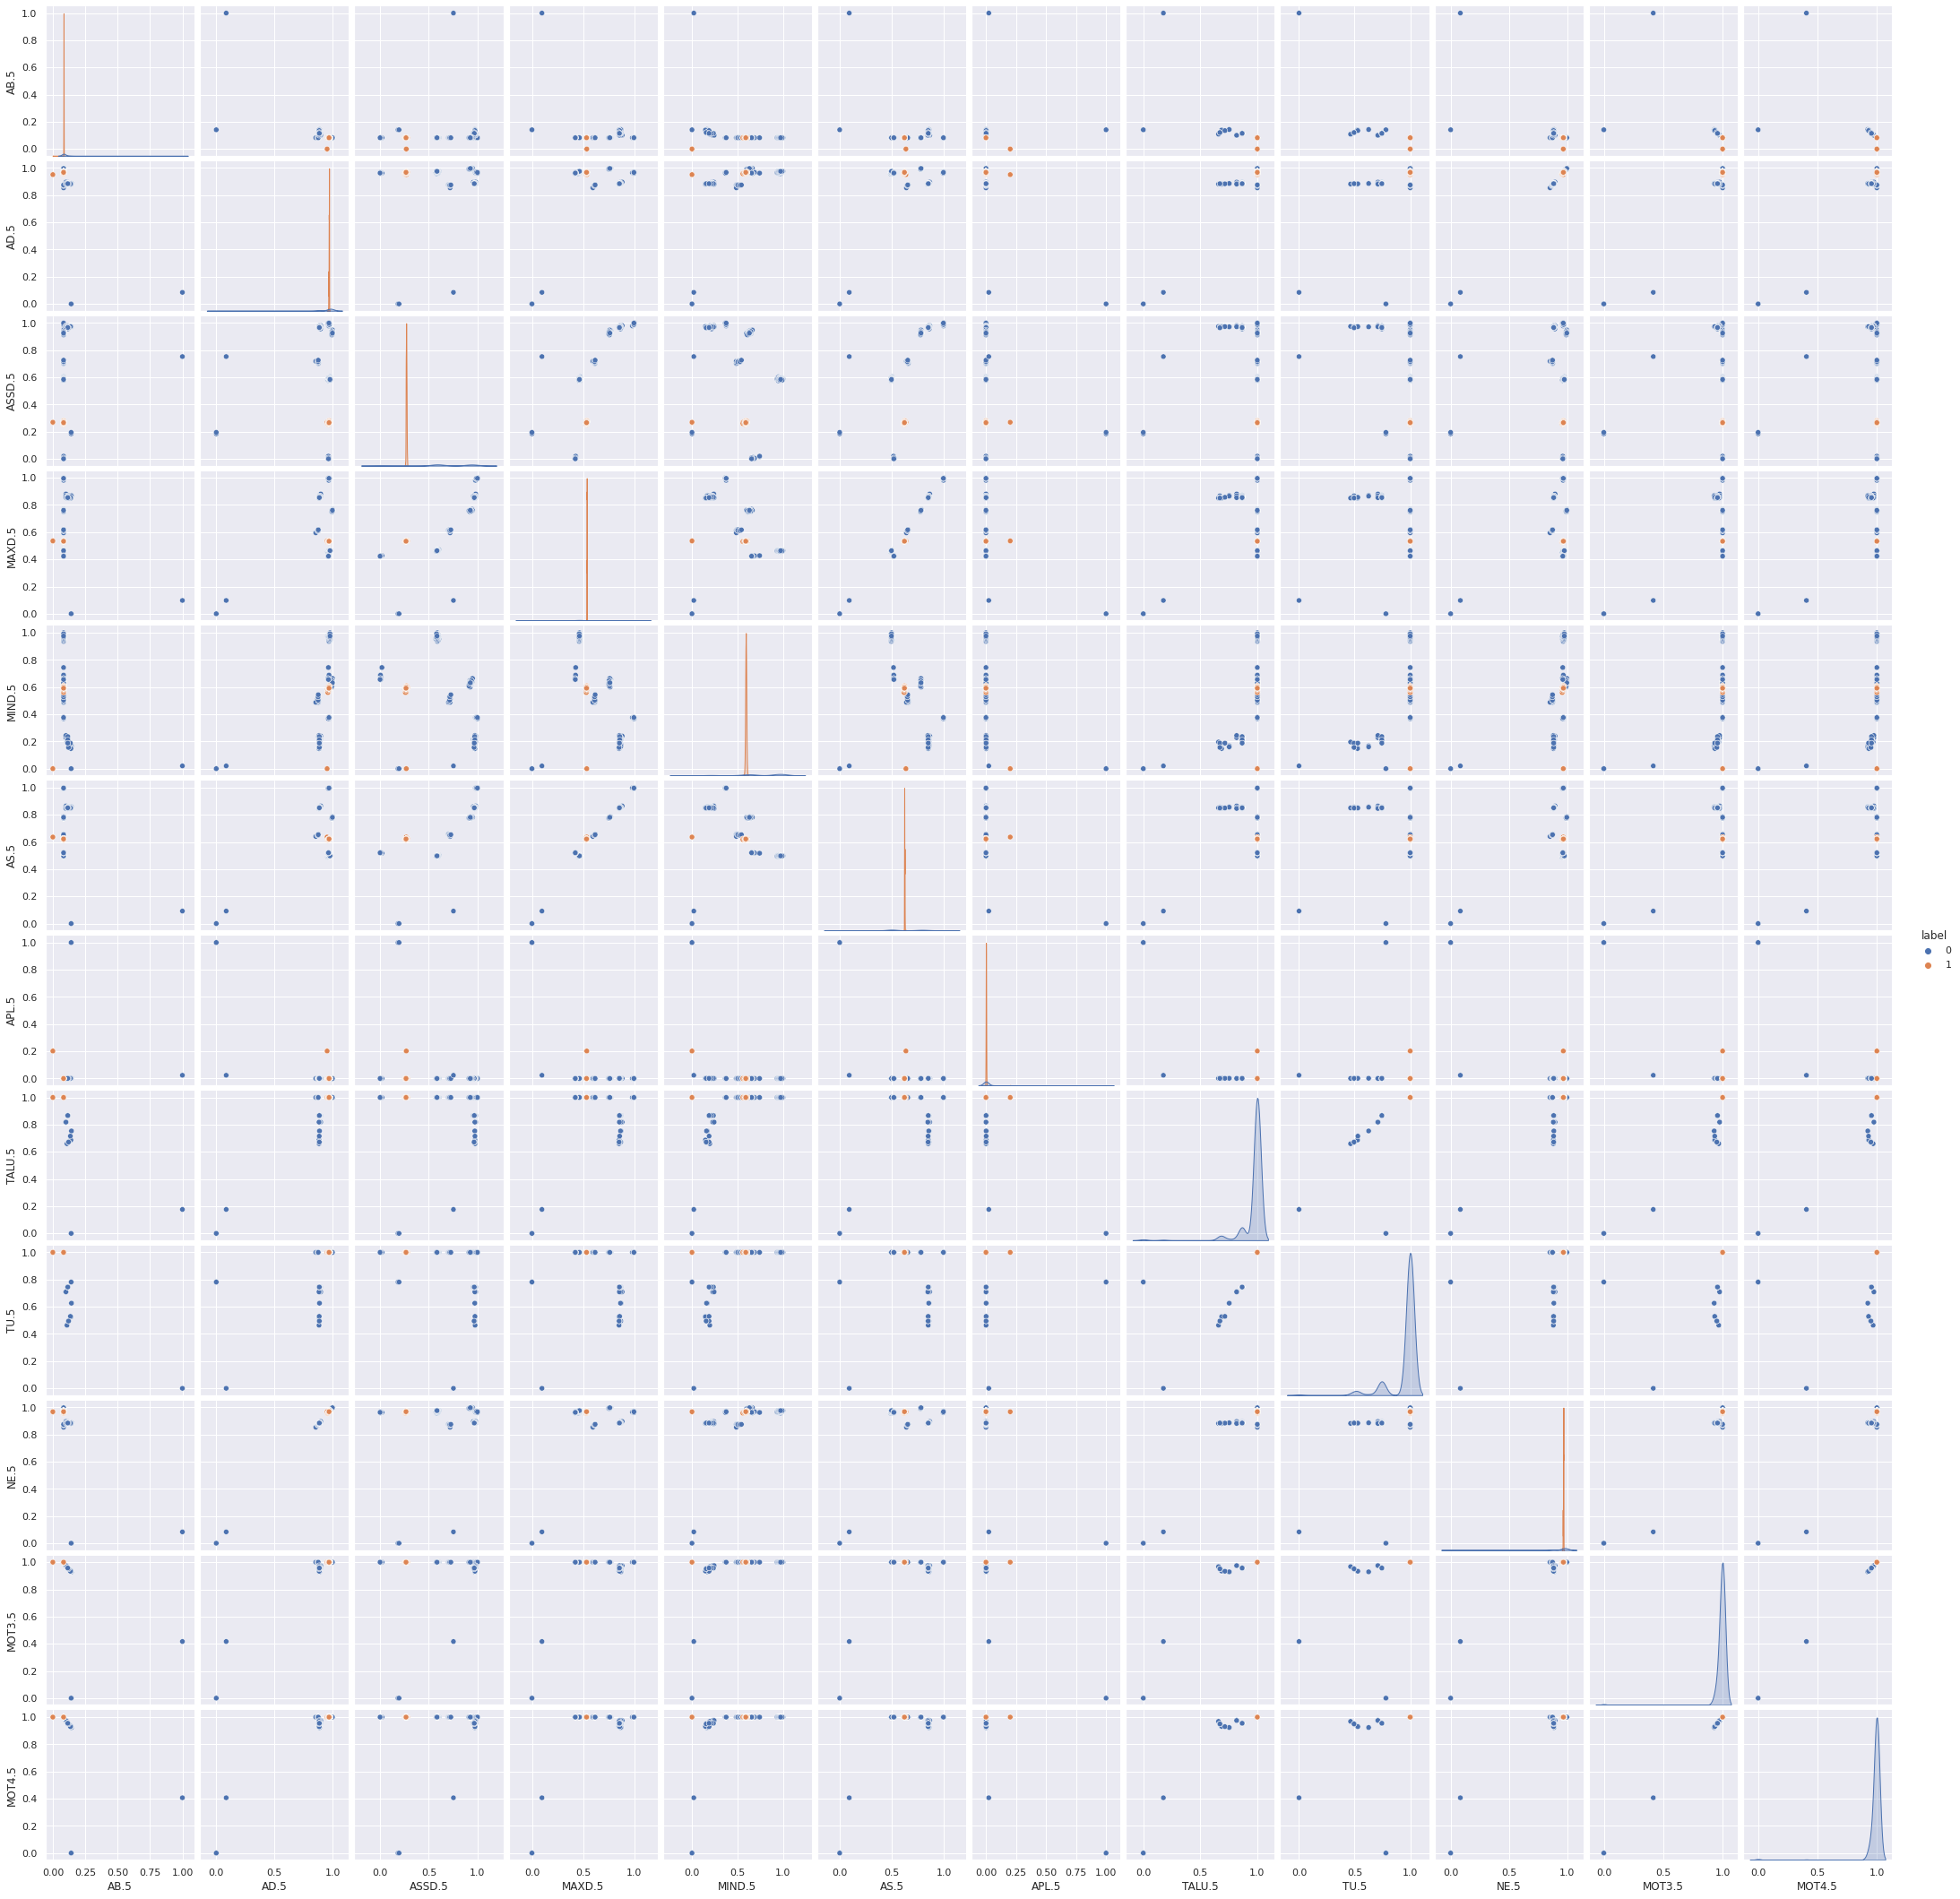

In [47]:
sns.pairplot(df, hue='label')

In [53]:
attr = 'AD'
col = [f"{attr}.{group}" for group in range(1, 11) ]
col.append('label')

X = scaler.fit_transform(df_complexNet[col])

df = pd.DataFrame(X, columns=col)

df['label'] = df_complexNet['label']

df.describe()

,AD.1,AD.2,AD.3,AD.4,AD.5,AD.6,AD.7,AD.8,AD.9,AD.10,label
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,0.963796,0.963809,0.963849,0.963904,0.963986,0.964067,0.964195,0.964327,0.964494,0.964887,0.765288
std,0.043523,0.043520,0.043511,0.043499,0.043479,0.043468,0.043441,0.043424,0.043381,0.043380,0.423942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.964867,0.964882,0.964923,0.964982,0.965070,0.965160,0.965311,0.965462,0.965658,0.966101,1.000000
50%,0.966815,0.966829,0.966868,0.966923,0.967007,0.967092,0.967235,0.967377,0.967528,0.967964,1.000000
75%,0.968137,0.968150,0.968188,0.968241,0.968321,0.968403,0.968540,0.968676,0.968854,0.969284,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


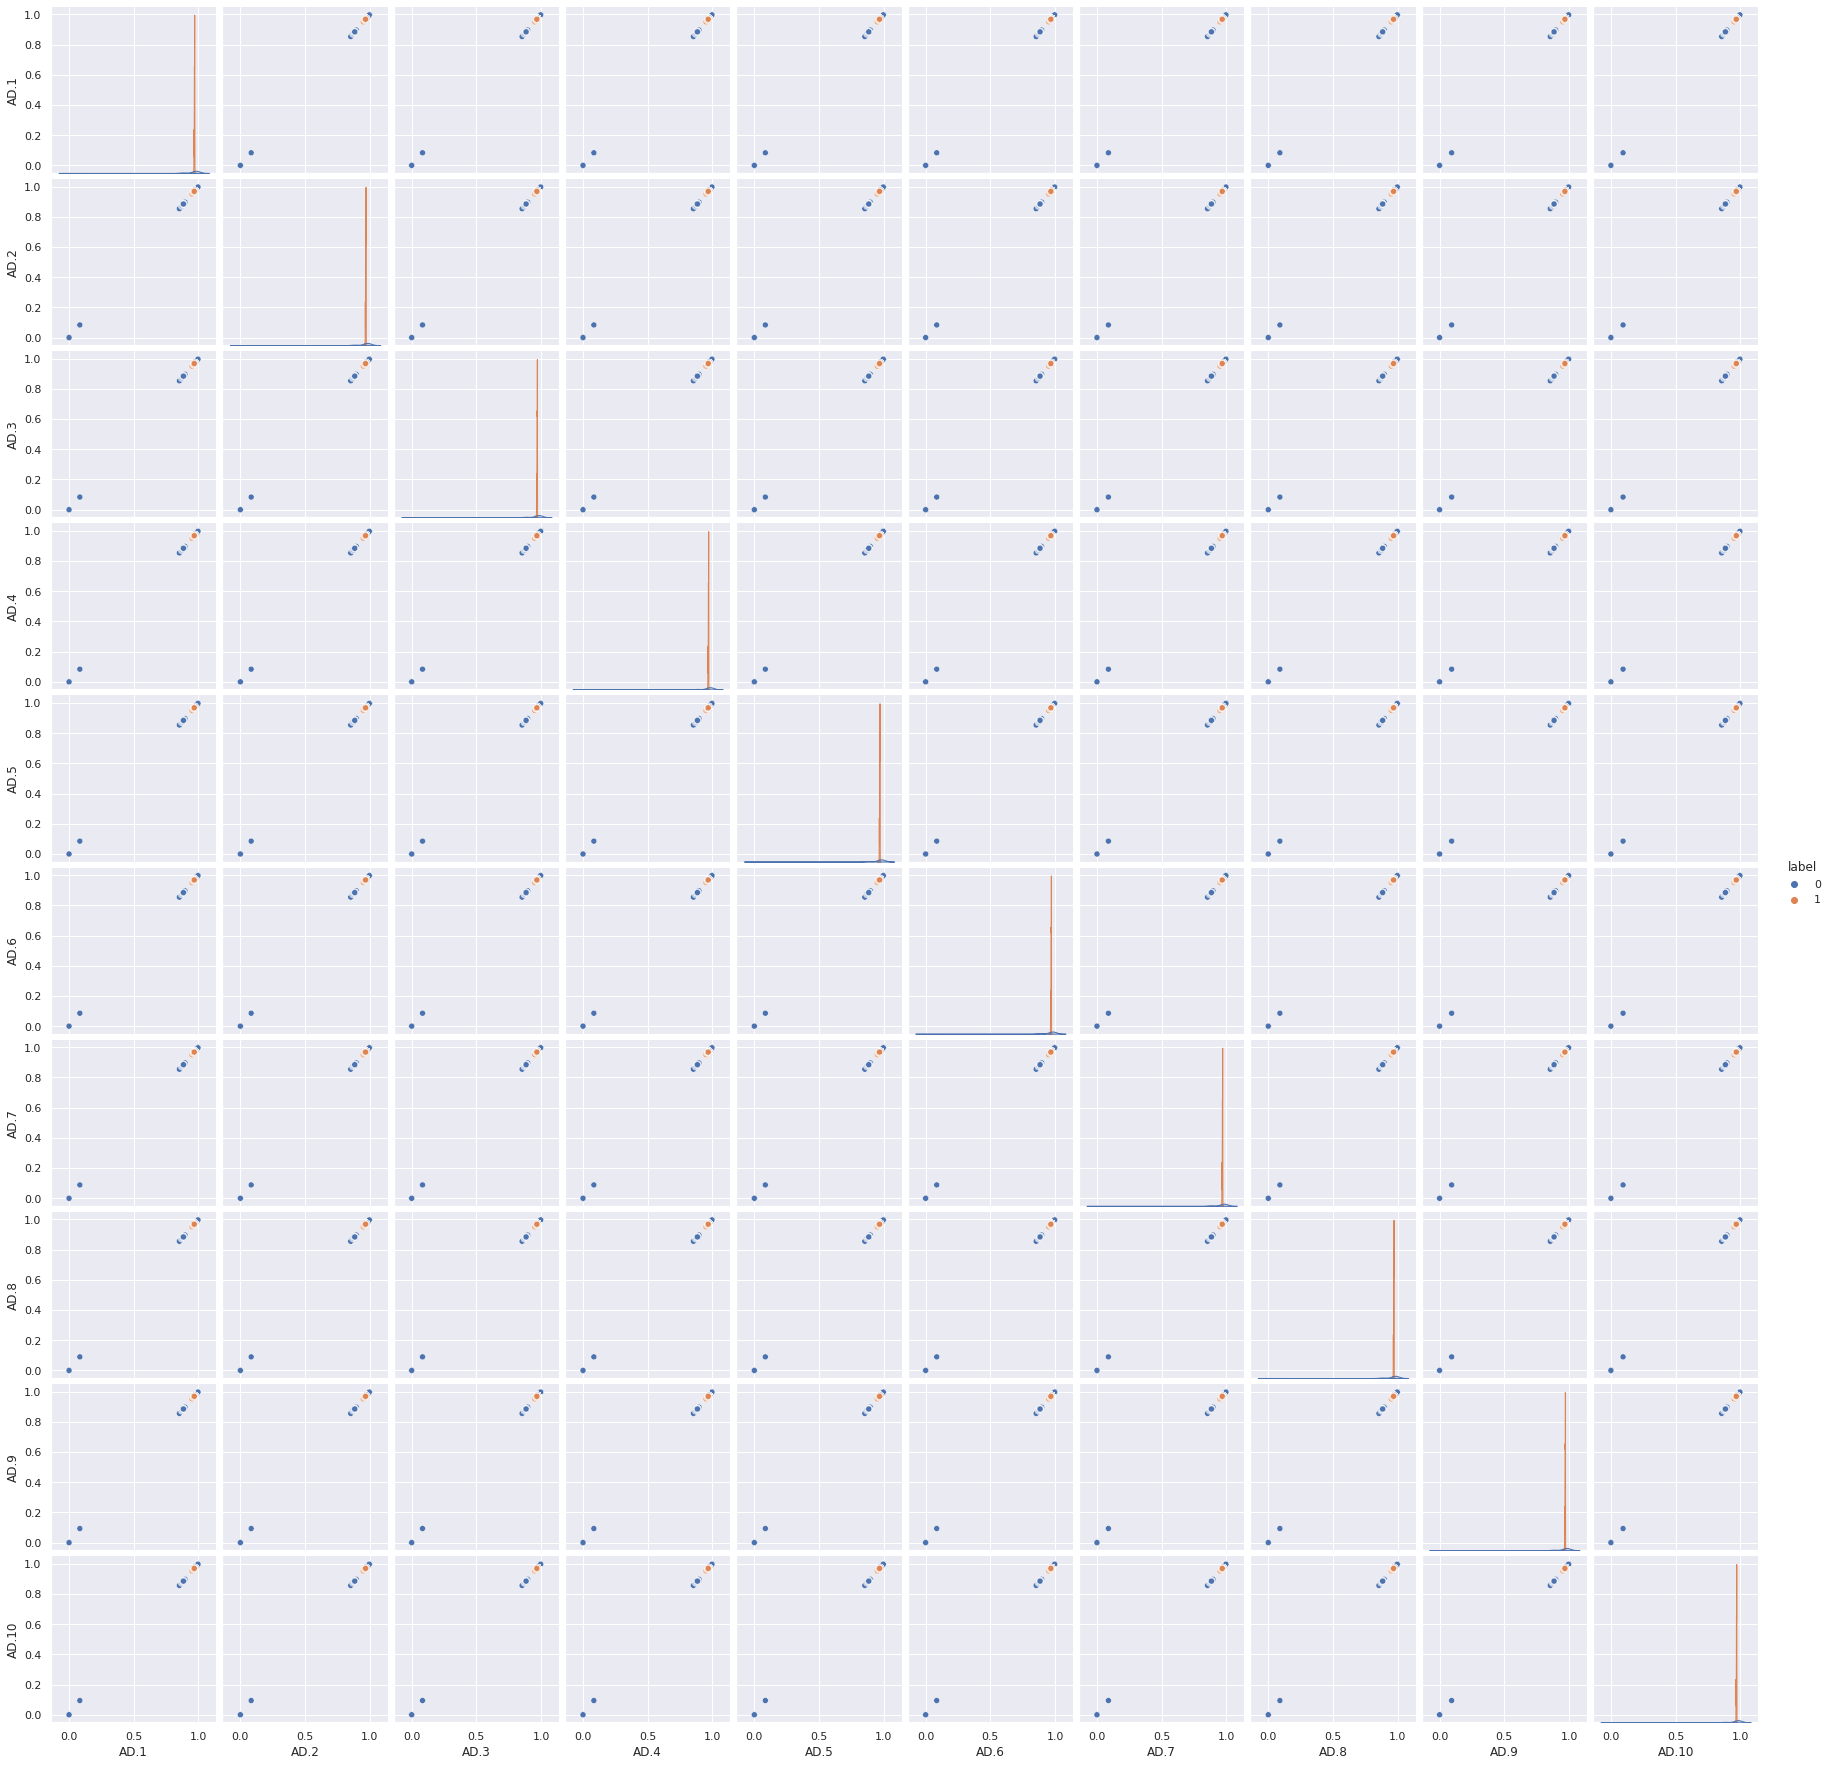

In [54]:
# todas as variáveis de um mesmo tipo estão correlacionadas.
sns.pairplot(df, hue='label')

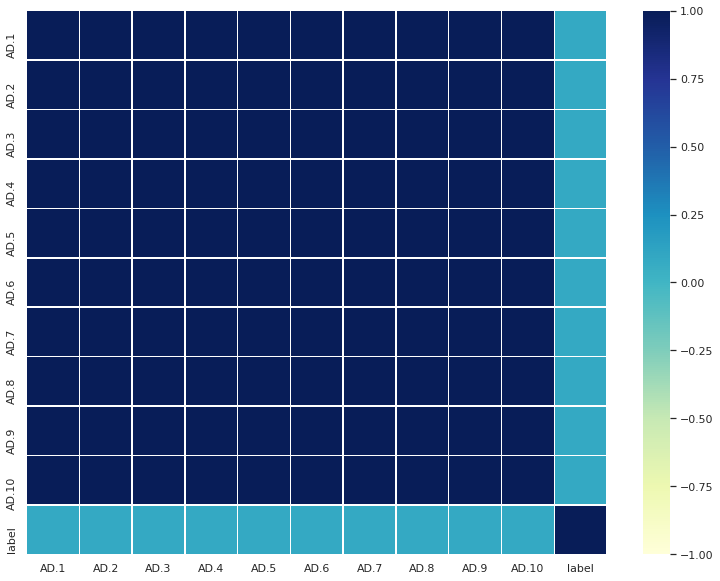

In [55]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap="YlGnBu")